In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test_df=pd.read_csv("test_x.csv")
data=train.copy()

In [3]:
data.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [4]:
data["Öbek İsmi"].value_counts()

obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: Öbek İsmi, dtype: int64

In [5]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

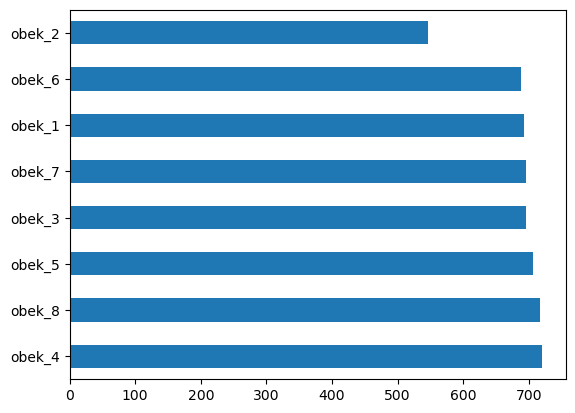

In [6]:
data["Öbek İsmi"].value_counts().plot.barh();

In [7]:
data.describe().round(3)

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
count,5460.000,5460.000,5460.000,5460.000,5460.000
mean,2729.500,363571.133,16616.612,24.041,73.446
std,1576.311,219714.442,14099.172,14.946,47.214
min,0.000,43922.989,2859.254,0.000,3.978
25%,1364.750,215693.439,4931.859,11.551,25.009
50%,2729.500,286925.436,8426.819,20.096,82.486
75%,4094.250,468188.222,30579.245,35.918,104.473
max,5459.000,1192437.145,48605.594,64.616,242.308


In [8]:
data.corr()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
index,1.000000,0.036008,0.019259,0.012507,-0.001693
Yıllık Ortalama Gelir,0.036008,1.000000,0.740238,0.444398,0.145425
Yıllık Ortalama Satın Alım Miktarı,0.019259,0.740238,1.000000,0.418499,0.133864
Yıllık Ortalama Sipariş Verilen Ürün Adedi,0.012507,0.444398,0.418499,1.000000,0.659455
Yıllık Ortalama Sepete Atılan Ürün Adedi,-0.001693,0.145425,0.133864,0.659455,1.000000


In [9]:
data.drop("index",axis=1,inplace=True)

In [10]:
data.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [11]:
df_2 = data[data["Öbek İsmi"] == "obek_2"]      


In [12]:
from sklearn.utils import resample
desired_sample_count = 150

df_2_upsampled = resample(df_2, replace=True, n_samples=desired_sample_count, random_state=12)



In [13]:
df_2_upsampled.shape

(150, 13)

In [14]:
balanced_data = pd.concat([data, df_2_upsampled])

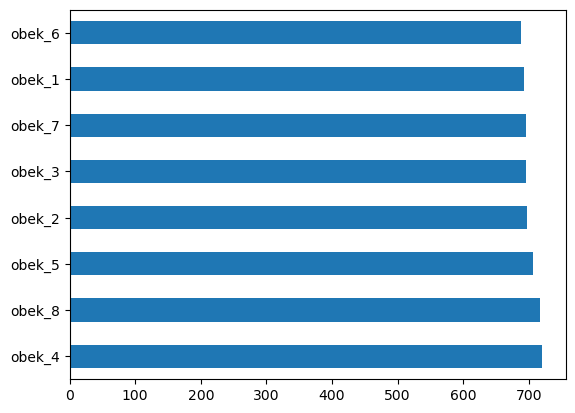

In [15]:
balanced_data["Öbek İsmi"].value_counts().plot.barh();

In [ ]:
hopa=data.copy()

In [16]:
#yola devam

In [17]:
data=balanced_data

In [18]:
x=data.drop("Öbek İsmi",axis=1)
y=data["Öbek İsmi"]

In [19]:
#category çecirme

In [21]:
#dönüştürelecek DataFrame adı -->data

columns_l = list(x.columns)
categorical_columns = []

data=x

object_to_category = False  # Önce döngüde herhangi bir değişiklik yapılmadığını varsayalım

for i in columns_l:
    if data[i].dtype == 'object' or data[i].dtype.name == 'category':
        categorical_columns.append(i)
        if data[i].dtype == 'object':
            object_to_category = True  # En az bir "object" tipinde sütun bulundu

# "object" tipindeki sütunları "category" tipine dönüştürme ve çevrilenleri yazdırma
for column in categorical_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Eğer dönüştürme yapıldıysa, çevrilenleri yazdırma
if object_to_category:
    print("Kategorik değişkene çevrilenler:")
    for column in categorical_columns:
        if data[column].dtype == 'category':
            print(column)
else:
    print("Object tipinde kolon yok.")
    
x=data

Kategorik değişkene çevrilenler:
Cinsiyet
Yaş Grubu
Medeni Durum
Eğitim Düzeyi
İstihdam Durumu
Yaşadığı Şehir
En Çok İlgilendiği Ürün Grubu
Eğitime Devam Etme Durumu


In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 4006
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Cinsiyet                                    5610 non-null   category
 1   Yaş Grubu                                   5610 non-null   category
 2   Medeni Durum                                5610 non-null   category
 3   Eğitim Düzeyi                               5610 non-null   category
 4   İstihdam Durumu                             5610 non-null   category
 5   Yıllık Ortalama Gelir                       5610 non-null   float64 
 6   Yaşadığı Şehir                              5610 non-null   category
 7   En Çok İlgilendiği Ürün Grubu               5610 non-null   category
 8   Yıllık Ortalama Satın Alım Miktarı          5610 non-null   float64 
 9   Yıllık Ortalama Sipariş Verilen Ürün Adedi  5610 non-null   float64 
 10  

In [25]:
#dumy değişken dönüşümü

In [26]:
import pandas as pd
#girdi--> data

df = x

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

x=df

In [27]:
x.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,748266.440879,32010.900881,37.310644,102.936904,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,246298.609605,4145.729891,11.554851,82.176053,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,1
2,268582.732360,9924.379414,55.353236,141.661426,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,327721.837865,6417.780714,15.417239,17.097397,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1
4,397431.626948,7886.663061,14.689837,20.470459,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 4006
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Yıllık Ortalama Gelir                           5610 non-null   float64
 1   Yıllık Ortalama Satın Alım Miktarı              5610 non-null   float64
 2   Yıllık Ortalama Sipariş Verilen Ürün Adedi      5610 non-null   float64
 3   Yıllık Ortalama Sepete Atılan Ürün Adedi        5610 non-null   float64
 4   Cinsiyet_Kadın                                  5610 non-null   uint8  
 5   Yaş Grubu_31-40                                 5610 non-null   uint8  
 6   Yaş Grubu_41-50                                 5610 non-null   uint8  
 7   Yaş Grubu_51-60                                 5610 non-null   uint8  
 8   Yaş Grubu_>60                                   5610 non-null   uint8  
 9   Medeni Durum_Evli                        

In [33]:
dumy_colons = []


for column in x.columns:
    if x[column].dtype == "uint8":
        dumy_colons.append(column)
    else:
        pass


In [34]:
dumy_colons

['Cinsiyet_Kadın',
 'Yaş Grubu_31-40',
 'Yaş Grubu_41-50',
 'Yaş Grubu_51-60',
 'Yaş Grubu_>60',
 'Medeni Durum_Evli',
 'Eğitim Düzeyi_Doktora Ötesi',
 'Eğitim Düzeyi_Eğitimsiz',
 'Eğitim Düzeyi_Lise Mezunu',
 'Eğitim Düzeyi_Ortaokul Mezunu',
 'Eğitim Düzeyi_Yüksek Lisans Mezunu',
 'Eğitim Düzeyi_Yüksekokul Mezunu',
 'Eğitim Düzeyi_Üniversite Mezunu',
 'Eğitim Düzeyi_İlkokul Mezunu',
 'İstihdam Durumu_Emekli',
 'İstihdam Durumu_Kendi İşinin Sahibi',
 'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok',
 'Yaşadığı Şehir_Köy veya Kasaba',
 'Yaşadığı Şehir_Küçük Şehir',
 'Yaşadığı Şehir_Kırsal',
 'En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya',
 'En Çok İlgilendiği Ürün Grubu_Giyim',
 'En Çok İlgilendiği Ürün Grubu_Kozmetik',
 'En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri',
 'Eğitime Devam Etme Durumu_Etmiyor']

In [28]:
#standardizasyon

In [35]:
from sklearn.preprocessing import StandardScaler

# Veriyi alın
# x_train: eğitim verisi
# x_test: test verisi

x_train=x


# Seçilen dummy değişken sütunları
selected_dummy_cols = dumy_colons
# Seçilen dummy değişkenleri çıkarın ve kalan sütunlar üzerinde işlem yapın
x_train_without_dummy = x_train.drop(selected_dummy_cols, axis=1)

# StandardScaler nesnesini oluşturun
scaler = StandardScaler()

# Eğitim verisini kullanarak ölçeklendirme işlemini öğrenin ve uygulayın
x_train_scaled = scaler.fit_transform(x_train_without_dummy)




# Dummy değişken sütunları ile ölçeklendirilmiş verileri birleştirin
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train_without_dummy.columns, index=x_train_without_dummy.index)

# Dummy değişken sütunları ekleyerek ölçeklendirilmiş verileri tamamlanmış veriye dönüştürün
x_train_final = pd.concat([x_train_scaled_df, x_train[selected_dummy_cols]], axis=1)

x=x_train_final

x.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,1.778211,1.118361,0.902493,0.643934,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.511290,-0.864086,-0.840020,0.200040,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,1
2,-0.409651,-0.452968,2.123168,1.471915,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,-0.139915,-0.702443,-0.578709,-1.191427,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1
4,0.178035,-0.597940,-0.627922,-1.119307,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [36]:
##model denemeleri

In [46]:
#test datasını oluşturma

test_df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491


In [50]:
#dönüştürelecek DataFrame adı -->data

columns_l = list(test_df.columns)
categorical_columns = []

data=test_df

object_to_category = False  # Önce döngüde herhangi bir değişiklik yapılmadığını varsayalım

for i in columns_l:
    if data[i].dtype == 'object' or data[i].dtype.name == 'category':
        categorical_columns.append(i)
        if data[i].dtype == 'object':
            object_to_category = True  # En az bir "object" tipinde sütun bulundu

# "object" tipindeki sütunları "category" tipine dönüştürme ve çevrilenleri yazdırma
for column in categorical_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Eğer dönüştürme yapıldıysa, çevrilenleri yazdırma
if object_to_category:
    print("Kategorik değişkene çevrilenler:")
    for column in categorical_columns:
        if data[column].dtype == 'category':
            print(column)
else:
    print("Object tipinde kolon yok.")
    
test_df=data
test_df.head()

Kategorik değişkene çevrilenler:
Cinsiyet
Yaş Grubu
Medeni Durum
Eğitim Düzeyi
İstihdam Durumu
Yaşadığı Şehir
En Çok İlgilendiği Ürün Grubu
Eğitime Devam Etme Durumu


,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491


In [51]:
import pandas as pd
#girdi--> data

df = test_df

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

test_df=df

In [52]:
test_df.head()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,0,365331.930346,5566.587664,15.442635,19.646460,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,1,414899.236174,6756.766203,14.957246,19.675863,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,2,152825.872271,4493.915682,10.907930,46.904518,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
3,3,489052.908472,42670.646595,32.333021,48.083609,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,4,323635.711534,5959.266948,4.519968,12.752491,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [53]:
dumy_colons = []


for column in test_df.columns:
    if test_df[column].dtype == "uint8":
        dumy_colons.append(column)
    else:
        pass
dumy_colons

['Cinsiyet_Kadın',
 'Yaş Grubu_31-40',
 'Yaş Grubu_41-50',
 'Yaş Grubu_51-60',
 'Yaş Grubu_>60',
 'Medeni Durum_Evli',
 'Eğitim Düzeyi_Doktora Ötesi',
 'Eğitim Düzeyi_Eğitimsiz',
 'Eğitim Düzeyi_Lise Mezunu',
 'Eğitim Düzeyi_Ortaokul Mezunu',
 'Eğitim Düzeyi_Yüksek Lisans Mezunu',
 'Eğitim Düzeyi_Yüksekokul Mezunu',
 'Eğitim Düzeyi_Üniversite Mezunu',
 'Eğitim Düzeyi_İlkokul Mezunu',
 'İstihdam Durumu_Emekli',
 'İstihdam Durumu_Kendi İşinin Sahibi',
 'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok',
 'Yaşadığı Şehir_Köy veya Kasaba',
 'Yaşadığı Şehir_Küçük Şehir',
 'Yaşadığı Şehir_Kırsal',
 'En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya',
 'En Çok İlgilendiği Ürün Grubu_Giyim',
 'En Çok İlgilendiği Ürün Grubu_Kozmetik',
 'En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri',
 'Eğitime Devam Etme Durumu_Etmiyor']

In [54]:
from sklearn.preprocessing import StandardScaler

# Veriyi alın
# x_train: eğitim verisi
# x_test: test verisi

x_train=test_df


# Seçilen dummy değişken sütunları
selected_dummy_cols = dumy_colons
# Seçilen dummy değişkenleri çıkarın ve kalan sütunlar üzerinde işlem yapın
x_train_without_dummy = x_train.drop(selected_dummy_cols, axis=1)

# StandardScaler nesnesini oluşturun
scaler = StandardScaler()

# Eğitim verisini kullanarak ölçeklendirme işlemini öğrenin ve uygulayın
x_train_scaled = scaler.fit_transform(x_train_without_dummy)




# Dummy değişken sütunları ile ölçeklendirilmiş verileri birleştirin
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train_without_dummy.columns, index=x_train_without_dummy.index)

# Dummy değişken sütunları ekleyerek ölçeklendirilmiş verileri tamamlanmış veriye dönüştürün
x_train_final = pd.concat([x_train_scaled_df, x_train[selected_dummy_cols]], axis=1)

test_df=x_train_final

test_df.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,1.778211,1.118361,0.902493,0.643934,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.511290,-0.864086,-0.840020,0.200040,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,1
2,-0.409651,-0.452968,2.123168,1.471915,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,-0.139915,-0.702443,-0.578709,-1.191427,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1
4,0.178035,-0.597940,-0.627922,-1.119307,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [55]:
test_df.head()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,-1.731311,0.013800,-0.778776,-0.551195,-1.132406,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,-1.729830,0.235917,-0.695331,-0.584541,-1.131771,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,-1.728350,-0.938465,-0.853982,-0.862732,-0.543702,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
3,-1.726870,0.568208,1.822635,0.609184,-0.518237,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,-1.725389,-0.173046,-0.751244,-1.301588,-1.281298,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [ ]:
#lojistik

In [37]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(x,y)
loj_model

LogisticRegression(solver='liblinear')

In [38]:
loj_model.intercept_

array([-4.33101771, -8.24663244, -4.30018385, -2.56035751, -4.530359  ,
       -4.56325733, -2.90329848, -1.9549433 ])

In [39]:
loj_model.coef_

array([[ 2.30871524e-01,  1.27877900e+00, -4.36293813e+00,
        -2.38632541e+00,  4.85871897e-01, -5.71389829e-01,
        -2.23121376e-01, -5.53151759e-01, -9.35266510e-01,
        -7.62678092e-01,  2.68412906e-01, -2.04172072e-01,
        -8.49747496e-01, -4.26611528e-02, -1.01370008e-01,
        -6.03353588e-01, -5.65950541e-01, -1.71300542e-01,
        -1.06257413e+00, -2.03224646e-01, -9.19392166e-02,
        -1.50364274e-01, -2.72292145e-01,  1.57231119e-01,
        -3.04677232e-01,  1.04093196e+00,  1.52758499e+00,
        -7.17046417e-01, -1.05622636e+00],
       [-3.36337165e+00, -3.89562983e-01,  1.52579502e+00,
        -5.44291048e-01,  2.60146071e+00,  4.42149098e-01,
         8.22576540e-01,  9.73047540e-01,  1.23560062e+00,
         7.22452891e-01, -3.75926915e-01, -4.20099671e-01,
        -1.10956547e+00, -3.09782560e-01, -8.20874134e-01,
        -1.76728936e+00, -1.27088868e+00, -2.47420533e-01,
         2.45860574e-01, -5.09252054e-02,  1.55006762e+00,
         5.72

In [41]:
y_pred = loj_model.predict(x)

In [42]:
confusion_matrix(y, y_pred)

array([[640,   8,  20,   8,   4,   3,   6,   3],
       [  8, 657,   4,   3,   4,   7,   8,   6],
       [ 15,   9, 652,   1,   2,   8,   6,   2],
       [  6,   2,  10, 673,   8,   6,   6,   9],
       [  5,   2,   3,   3, 680,   5,   2,   6],
       [  4,   4,   3,   4,   2, 662,   5,   4],
       [  4,   4,  10,   6,   2,   6, 659,   4],
       [  3,   6,   4,   6,   6,   1,   3, 688]], dtype=int64)

In [43]:
accuracy_score(y, y_pred)

0.9467023172905525

In [44]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      obek_1       0.93      0.92      0.93       692
      obek_2       0.95      0.94      0.95       697
      obek_3       0.92      0.94      0.93       695
      obek_4       0.96      0.93      0.95       720
      obek_5       0.96      0.96      0.96       706
      obek_6       0.95      0.96      0.96       688
      obek_7       0.95      0.95      0.95       695
      obek_8       0.95      0.96      0.96       717

    accuracy                           0.95      5610
   macro avg       0.95      0.95      0.95      5610
weighted avg       0.95      0.95      0.95      5610



In [56]:
y_pred_test = loj_model.predict(x)

In [58]:
y_pred_test

array(['obek_4', 'obek_5', 'obek_8', ..., 'obek_2', 'obek_2', 'obek_2'],
      dtype=object)

In [ ]:
#catboost

In [59]:
from catboost import CatBoostClassifier

In [61]:
cat_model = CatBoostClassifier().fit(x,y)

Learning rate set to 0.086401
0:	learn: 1.6031912	total: 176ms	remaining: 2m 56s
1:	learn: 1.3458013	total: 187ms	remaining: 1m 33s
2:	learn: 1.1622621	total: 199ms	remaining: 1m 6s
3:	learn: 1.0260264	total: 211ms	remaining: 52.6s
4:	learn: 0.9187742	total: 224ms	remaining: 44.5s
5:	learn: 0.8316918	total: 235ms	remaining: 39s
6:	learn: 0.7582226	total: 246ms	remaining: 34.8s
7:	learn: 0.6987659	total: 256ms	remaining: 31.7s
8:	learn: 0.6480371	total: 266ms	remaining: 29.3s
9:	learn: 0.6030317	total: 276ms	remaining: 27.3s
10:	learn: 0.5640263	total: 286ms	remaining: 25.8s
11:	learn: 0.5308666	total: 299ms	remaining: 24.6s
12:	learn: 0.5011015	total: 309ms	remaining: 23.4s
13:	learn: 0.4748560	total: 319ms	remaining: 22.4s
14:	learn: 0.4520860	total: 328ms	remaining: 21.6s
15:	learn: 0.4312870	total: 338ms	remaining: 20.8s
16:	learn: 0.4134271	total: 348ms	remaining: 20.1s
17:	learn: 0.3975636	total: 358ms	remaining: 19.5s
18:	learn: 0.3829280	total: 367ms	remaining: 19s
19:	learn: 0.

177:	learn: 0.2063880	total: 2.12s	remaining: 9.78s
178:	learn: 0.2061722	total: 2.13s	remaining: 9.76s
179:	learn: 0.2059313	total: 2.14s	remaining: 9.74s
180:	learn: 0.2056914	total: 2.15s	remaining: 9.74s
181:	learn: 0.2054226	total: 2.16s	remaining: 9.72s
182:	learn: 0.2051251	total: 2.17s	remaining: 9.7s
183:	learn: 0.2048583	total: 2.18s	remaining: 9.68s
184:	learn: 0.2044392	total: 2.19s	remaining: 9.66s
185:	learn: 0.2041914	total: 2.2s	remaining: 9.64s
186:	learn: 0.2039916	total: 2.21s	remaining: 9.62s
187:	learn: 0.2038408	total: 2.22s	remaining: 9.6s
188:	learn: 0.2035628	total: 2.23s	remaining: 9.58s
189:	learn: 0.2032391	total: 2.24s	remaining: 9.56s
190:	learn: 0.2030364	total: 2.25s	remaining: 9.55s
191:	learn: 0.2028085	total: 2.27s	remaining: 9.53s
192:	learn: 0.2024498	total: 2.27s	remaining: 9.51s
193:	learn: 0.2022479	total: 2.28s	remaining: 9.49s
194:	learn: 0.2018733	total: 2.29s	remaining: 9.48s
195:	learn: 0.2015434	total: 2.31s	remaining: 9.46s
196:	learn: 0.2

338:	learn: 0.1650372	total: 3.79s	remaining: 7.39s
339:	learn: 0.1648599	total: 3.8s	remaining: 7.38s
340:	learn: 0.1645958	total: 3.81s	remaining: 7.37s
341:	learn: 0.1642845	total: 3.83s	remaining: 7.37s
342:	learn: 0.1641089	total: 3.84s	remaining: 7.35s
343:	learn: 0.1638508	total: 3.85s	remaining: 7.34s
344:	learn: 0.1636719	total: 3.86s	remaining: 7.32s
345:	learn: 0.1633620	total: 3.87s	remaining: 7.31s
346:	learn: 0.1632038	total: 3.88s	remaining: 7.29s
347:	learn: 0.1630159	total: 3.89s	remaining: 7.28s
348:	learn: 0.1629108	total: 3.9s	remaining: 7.27s
349:	learn: 0.1625943	total: 3.9s	remaining: 7.25s
350:	learn: 0.1621913	total: 3.92s	remaining: 7.24s
351:	learn: 0.1620189	total: 3.92s	remaining: 7.22s
352:	learn: 0.1617501	total: 3.93s	remaining: 7.21s
353:	learn: 0.1615017	total: 3.94s	remaining: 7.2s
354:	learn: 0.1611791	total: 3.95s	remaining: 7.18s
355:	learn: 0.1609175	total: 3.96s	remaining: 7.17s
356:	learn: 0.1607137	total: 3.97s	remaining: 7.16s
357:	learn: 0.16

500:	learn: 0.1336450	total: 5.47s	remaining: 5.45s
501:	learn: 0.1334701	total: 5.49s	remaining: 5.44s
502:	learn: 0.1331807	total: 5.5s	remaining: 5.43s
503:	learn: 0.1329336	total: 5.51s	remaining: 5.42s
504:	learn: 0.1326949	total: 5.52s	remaining: 5.41s
505:	learn: 0.1325563	total: 5.53s	remaining: 5.4s
506:	learn: 0.1323065	total: 5.54s	remaining: 5.38s
507:	learn: 0.1321133	total: 5.55s	remaining: 5.37s
508:	learn: 0.1319089	total: 5.56s	remaining: 5.36s
509:	learn: 0.1317150	total: 5.57s	remaining: 5.35s
510:	learn: 0.1316104	total: 5.58s	remaining: 5.33s
511:	learn: 0.1314923	total: 5.58s	remaining: 5.32s
512:	learn: 0.1312280	total: 5.59s	remaining: 5.31s
513:	learn: 0.1310945	total: 5.61s	remaining: 5.3s
514:	learn: 0.1309276	total: 5.61s	remaining: 5.29s
515:	learn: 0.1306018	total: 5.62s	remaining: 5.28s
516:	learn: 0.1304668	total: 5.63s	remaining: 5.26s
517:	learn: 0.1303614	total: 5.64s	remaining: 5.25s
518:	learn: 0.1302116	total: 5.65s	remaining: 5.24s
519:	learn: 0.1

660:	learn: 0.1099593	total: 7.18s	remaining: 3.68s
661:	learn: 0.1098271	total: 7.19s	remaining: 3.67s
662:	learn: 0.1097267	total: 7.2s	remaining: 3.66s
663:	learn: 0.1096309	total: 7.21s	remaining: 3.65s
664:	learn: 0.1095317	total: 7.23s	remaining: 3.64s
665:	learn: 0.1094256	total: 7.24s	remaining: 3.63s
666:	learn: 0.1093347	total: 7.25s	remaining: 3.62s
667:	learn: 0.1092663	total: 7.26s	remaining: 3.61s
668:	learn: 0.1091732	total: 7.27s	remaining: 3.6s
669:	learn: 0.1090362	total: 7.28s	remaining: 3.59s
670:	learn: 0.1088990	total: 7.29s	remaining: 3.58s
671:	learn: 0.1087629	total: 7.3s	remaining: 3.56s
672:	learn: 0.1086502	total: 7.32s	remaining: 3.55s
673:	learn: 0.1085031	total: 7.33s	remaining: 3.54s
674:	learn: 0.1083342	total: 7.34s	remaining: 3.53s
675:	learn: 0.1082229	total: 7.35s	remaining: 3.52s
676:	learn: 0.1080486	total: 7.36s	remaining: 3.51s
677:	learn: 0.1079476	total: 7.37s	remaining: 3.5s
678:	learn: 0.1078179	total: 7.38s	remaining: 3.49s
679:	learn: 0.10

825:	learn: 0.0902014	total: 9.09s	remaining: 1.92s
826:	learn: 0.0901068	total: 9.1s	remaining: 1.9s
827:	learn: 0.0899895	total: 9.11s	remaining: 1.89s
828:	learn: 0.0898478	total: 9.12s	remaining: 1.88s
829:	learn: 0.0897657	total: 9.13s	remaining: 1.87s
830:	learn: 0.0896650	total: 9.14s	remaining: 1.86s
831:	learn: 0.0895583	total: 9.15s	remaining: 1.85s
832:	learn: 0.0894592	total: 9.16s	remaining: 1.84s
833:	learn: 0.0892994	total: 9.17s	remaining: 1.83s
834:	learn: 0.0891818	total: 9.18s	remaining: 1.81s
835:	learn: 0.0891018	total: 9.19s	remaining: 1.8s
836:	learn: 0.0890073	total: 9.2s	remaining: 1.79s
837:	learn: 0.0888907	total: 9.21s	remaining: 1.78s
838:	learn: 0.0887945	total: 9.22s	remaining: 1.77s
839:	learn: 0.0887053	total: 9.23s	remaining: 1.76s
840:	learn: 0.0886401	total: 9.24s	remaining: 1.75s
841:	learn: 0.0885613	total: 9.25s	remaining: 1.74s
842:	learn: 0.0884250	total: 9.26s	remaining: 1.73s
843:	learn: 0.0883107	total: 9.27s	remaining: 1.71s
844:	learn: 0.08

988:	learn: 0.0752113	total: 10.8s	remaining: 120ms
989:	learn: 0.0751180	total: 10.8s	remaining: 109ms
990:	learn: 0.0750159	total: 10.8s	remaining: 97.9ms
991:	learn: 0.0748842	total: 10.8s	remaining: 87ms
992:	learn: 0.0747931	total: 10.8s	remaining: 76.1ms
993:	learn: 0.0747096	total: 10.8s	remaining: 65.3ms
994:	learn: 0.0745657	total: 10.8s	remaining: 54.4ms
995:	learn: 0.0744858	total: 10.8s	remaining: 43.5ms
996:	learn: 0.0744324	total: 10.8s	remaining: 32.6ms
997:	learn: 0.0743188	total: 10.8s	remaining: 21.7ms
998:	learn: 0.0742447	total: 10.9s	remaining: 10.9ms
999:	learn: 0.0741725	total: 10.9s	remaining: 0us


In [62]:
y_pred_catboost = cat_model.predict(x)

In [63]:
accuracy_score(y, y_pred_catboost)

0.9725490196078431

In [64]:
test_pred_cat=cat_model.predict(test_df)

In [65]:
test_pred_cat

array([['obek_3'],
       ['obek_3'],
       ['obek_2'],
       ...,
       ['obek_7'],
       ['obek_5'],
       ['obek_6']], dtype=object)

In [70]:
test_pred_cat.shape

(2340, 1)

In [97]:
test_pred_cat.head(5)

,0
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1


In [100]:
sunum.head()

,0
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1


In [73]:
test_df_index=pd.DataFrame(test_df.index)

In [78]:
test_df_index.shape

(2340, 1)

In [98]:
test_df_index.head()

,0
0,0
1,1
2,2
3,3
4,4


In [77]:
test_df.index

RangeIndex(start=0, stop=2340, step=1)

In [104]:
veri = {
    'id': range(2340),
    'Öbek İsmi': test_pred_cat
}

In [107]:
veri

{'id': range(0, 2340),
 'Öbek İsmi':            0
 0     obek_3
 1     obek_3
 2     obek_2
 3     obek_6
 4     obek_1
 ...      ...
 2335  obek_8
 2336  obek_2
 2337  obek_7
 2338  obek_5
 2339  obek_6
 
 [2340 rows x 1 columns]}

In [106]:
Tahmin_Dataframe = pd.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)
Tahmin_Dataframe

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)